In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv(r"C:\Users\ASUS\Downloads\Kelompok referensi\Kel 1\data_new.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331506 entries, 0 to 331505
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Income                             331506 non-null  int64  
 1   Age                                331506 non-null  int64  
 2   Experience                         331506 non-null  int64  
 3   Married/Single                     331506 non-null  int64  
 4   House_Ownership                    331506 non-null  int64  
 5   Car_Ownership                      331506 non-null  int64  
 6   CURRENT_HOUSE_YRS                  331506 non-null  int64  
 7   Income_norm                        331506 non-null  float64
 8   Profession Group_artist            331506 non-null  int64  
 9   Profession Group_business          331506 non-null  int64  
 10  Profession Group_service           331506 non-null  int64  
 11  Profession Group_social_scientist  3315

In [4]:
# Melakukan Encoding

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data = pd.get_dummies(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331506 entries, 0 to 331505
Data columns (total 29 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Income                                 331506 non-null  int64  
 1   Age                                    331506 non-null  int64  
 2   Experience                             331506 non-null  int64  
 3   Married/Single                         331506 non-null  int64  
 4   House_Ownership                        331506 non-null  int64  
 5   Car_Ownership                          331506 non-null  int64  
 6   CURRENT_HOUSE_YRS                      331506 non-null  int64  
 7   Income_norm                            331506 non-null  float64
 8   Profession Group_artist                331506 non-null  int64  
 9   Profession Group_business              331506 non-null  int64  
 10  Profession Group_service               331506 non-null  

In [5]:
data.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_HOUSE_YRS,Income_norm,Profession Group_artist,Profession Group_business,...,Risk_Class,Age_Group_Adult,Age_Group_Elderly,Age_Group_YoungAdult,Income_Group_rendah,Income_Group_sedang,Income_Group_tinggi,Experience_Group_baru,Experience_Group_berpengalaman,Experience_Group_sangat berpengalaman
0,1303834,23,3,1,2,0,13,0.129487,0,0,...,False,False,False,True,True,False,False,True,False,False
1,7574516,40,10,1,2,0,13,0.757206,0,0,...,False,True,False,False,False,False,True,False,False,True
2,3991815,66,4,0,2,0,10,0.398564,0,0,...,False,False,True,False,True,False,False,True,False,False
3,6256451,41,2,1,2,1,12,0.625263,0,0,...,True,True,False,False,False,True,False,True,False,False
4,5768871,47,11,1,2,0,14,0.576454,0,0,...,True,False,True,False,False,True,False,False,False,True


In [6]:
data = data.drop(['Age', 'Income', 'Experience', 'Income_Group_rendah', 'Income_Group_sedang', 'Income_Group_tinggi'], axis=1)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331506 entries, 0 to 331505
Data columns (total 23 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Married/Single                         331506 non-null  int64  
 1   House_Ownership                        331506 non-null  int64  
 2   Car_Ownership                          331506 non-null  int64  
 3   CURRENT_HOUSE_YRS                      331506 non-null  int64  
 4   Income_norm                            331506 non-null  float64
 5   Profession Group_artist                331506 non-null  int64  
 6   Profession Group_business              331506 non-null  int64  
 7   Profession Group_service               331506 non-null  int64  
 8   Profession Group_social_scientist      331506 non-null  int64  
 9   Profession Group_tech_engineering      331506 non-null  int64  
 10  Region_Center                          331506 non-null  

# SPLIT DATA

In [8]:
X = data.drop(columns=['Risk_Class'])
y = data['Risk_Class']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

In [11]:
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(RandomForestClassifier(), X, y, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval train): '+ str(score['train_score'].mean()))
    print('recall (crossval test): '+ str(score['test_score'].mean()))

# Fit Model RandomForest

In [12]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

## Visualisasi

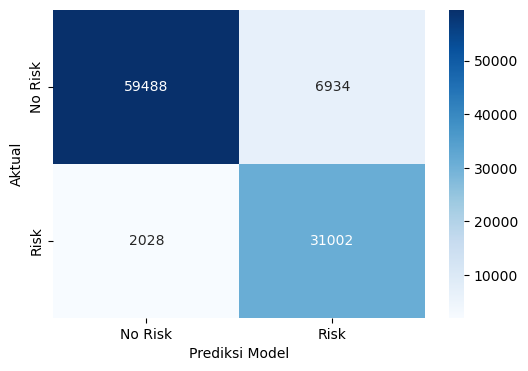

In [13]:
#visualisasi confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf_model.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)

#heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi Model')
plt.ylabel('Aktual')
class_names = ['No Risk', 'Risk']
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

plt.show()

## Evaluasi Model

In [14]:
eval_classification(rf_model)

Accuracy (Test Set): 0.91
Precision (Test Set): 0.82
Recall (Test Set): 0.94
F1-Score (Test Set): 0.87
roc_auc (test-proba): 0.96
roc_auc (train-proba): 0.97
recall (crossval train): 0.9973710833871572
recall (crossval test): 0.9317195589724754


## Learning Curve

param value: 1; train: 0.973826281940001; test: 0.9602909396376619
param value: 3; train: 0.9675160842077103; test: 0.956453047352266
param value: 5; train: 0.9637508947661821; test: 0.9537762069993971
param value: 7; train: 0.9611985003156585; test: 0.9517660100944672
param value: 9; train: 0.9597087218703039; test: 0.9502057284566786
param value: 12; train: 0.958534298503233; test: 0.9491866273200849
param value: 14; train: 0.9577660830273276; test: 0.9483625502779578
param value: 16; train: 0.9562503025524014; test: 0.9471425834447298
param value: 18; train: 0.9546777281828651; test: 0.9457555636998866
param value: 21; train: 0.9514240129572811; test: 0.9434367662472957
param value: 23; train: 0.9503330462231037; test: 0.9428117382893312
param value: 25; train: 0.9494253931106029; test: 0.9422865241959335
param value: 27; train: 0.9484228960035893; test: 0.941167133561825
param value: 29; train: 0.9477353999685931; test: 0.940832944326204
param value: 32; train: 0.9465470651864953; 

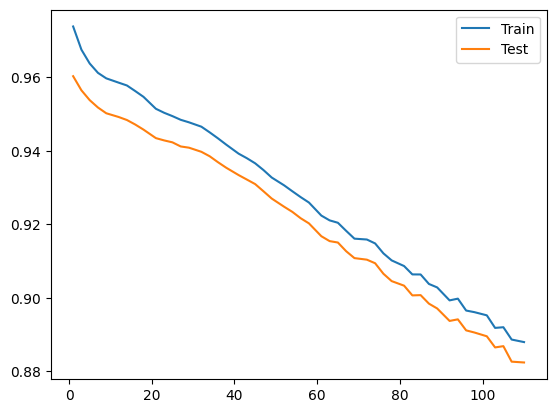

In [ ]:
#learning curve
param_values = [int(x) for x in np.linspace(1, 110, 50)]

train_scores = []
test_scores = []

for c in param_values:
  model = RandomForestClassifier(n_estimators=110, min_samples_leaf=c)
  model.fit(X_train, y_train)

  # eval on train
  y_pred_train_proba = model.predict_proba(X_train)
  train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
  train_scores.append(train_auc)

  # eval on test
  y_pred_proba = model.predict_proba(X_test)
  test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
  test_scores.append(test_auc)

  print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))


plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

## Hyperparameter Tuning

In [15]:
hyperparameters = {
    'n_estimators': [1, 110],
    'max_depth': [1, 30],
    'min_samples_split': [1, 10],
    'min_samples_leaf': [1, 10]
}

In [16]:
# Inisialisasi Model
dt_model = RandomForestClassifier(random_state=42)
model = GridSearchCV(dt_model, hyperparameters, cv=5, scoring='recall')
model.fit(X_train, y_train)

c:\ANACONDA\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ANACONDA\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ANACONDA\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\ANACONDA\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\ANACONDA\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_paramet

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [1, 30], 'min_samples_leaf': [1, 10],
                         'min_samples_split': [1, 10],
                         'n_estimators': [1, 110]},
             scoring='recall')

## Predict & Evaluation

In [17]:
# Predict & Evaluation
y_pred = model.predict(X_test)
eval_classification(model)

Accuracy (Test Set): 0.91
Precision (Test Set): 0.83
Recall (Test Set): 0.93
F1-Score (Test Set): 0.88
roc_auc (test-proba): 0.96
roc_auc (train-proba): 0.97
recall (crossval train): 0.9972195012635166
recall (crossval test): 0.9315204737772149


## Check the best hyperparameter after tuning


In [18]:
# Lakukan pencarian hiperparameter pada data pelatihan
model.fit(X_train, y_train)

# Dapatkan model terbaik, parameter terbaik, dan skor terbaik
best_model = model.best_estimator_
best_params = model.best_params_
best_score = model.best_score_

# Cetak hasilnya
print("Best Model:", best_model)
print("Best Parameters:", best_params)
print("Best Score:", best_score)

c:\ANACONDA\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ANACONDA\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ANACONDA\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\ANACONDA\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\ANACONDA\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_paramet

Best Model: RandomForestClassifier(max_depth=30, min_samples_split=10, n_estimators=110,
                       random_state=42)
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 110}
Best Score: 0.9320270720290065


## Feature Importance

In [19]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 6))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')
    plt.show()

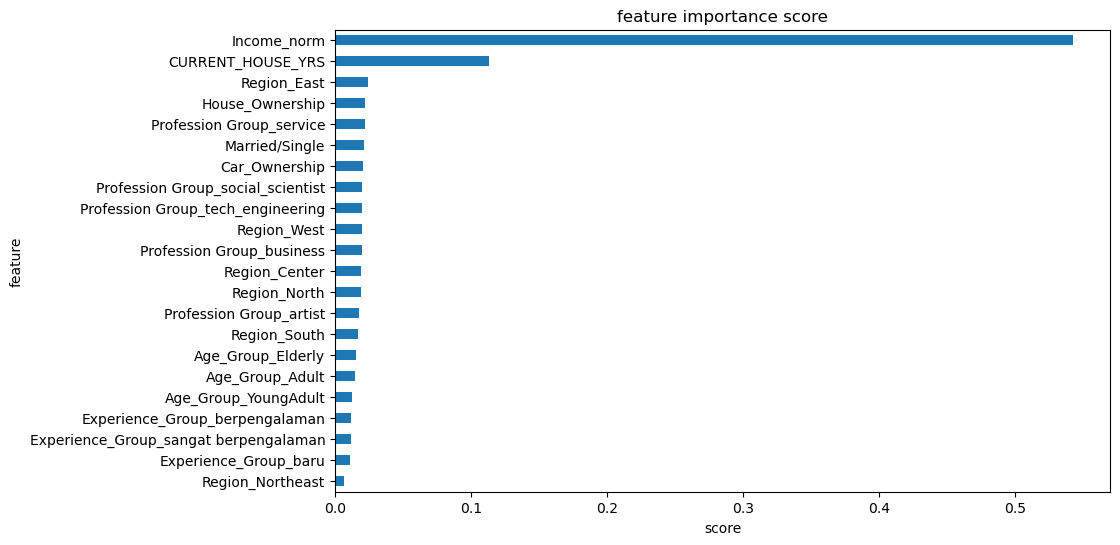

In [20]:
show_feature_importance(model.best_estimator_)

# Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

## Visualisasi

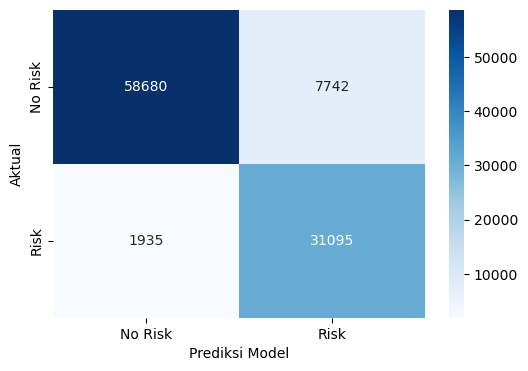

In [22]:
#visualisasi confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = DT_model.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)

#heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi Model')
plt.ylabel('Aktual')
class_names = ['No Risk', 'Risk']
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

plt.show()

## Evaluasi Model

In [23]:
eval_classification(DT_model)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.80
Recall (Test Set): 0.94
F1-Score (Test Set): 0.87
roc_auc (test-proba): 0.92
roc_auc (train-proba): 0.98
recall (crossval train): 0.9971742553122815
recall (crossval test): 0.9316290612349188


## Hyperparameter Tuning

In [24]:
# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, 10)]
min_samples_split = [1, 5, 10]
min_samples_leaf = [1, 5, 10]
max_features = ['auto', 'sqrt']
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model_dt = GridSearchCV(dt, hyperparameters, cv=5, scoring='recall')
model_dt.fit(X_train, y_train)

c:\ANACONDA\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
2400 fits failed out of a total of 3600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1800 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ANACONDA\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ANACONDA\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\ANACONDA\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\ANACONDA\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_p

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 13, 25, 37, 49, 61, 73, 85, 97, 110],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [1, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='recall')

## Predict & Evaluation

In [ ]:
# Predict & Evaluation
y_pred = model_dt.predict(X_test)
eval_classification(model_dt)

Accuracy (Test Set): 0.91
Precision (Test Set): 0.81
Recall (Test Set): 0.93
F1-Score (Test Set): 0.87
roc_auc (test-proba): 0.93
roc_auc (train-proba): 0.97
recall (crossval train): 0.997289637419583
recall (crossval test): 0.9318372056218255


## Check the best hyperparameter after tuning


In [ ]:
# Lakukan pencarian hiperparameter pada data pelatihan
model_dt.fit(X_train, y_train)

# Dapatkan model terbaik, parameter terbaik, dan skor terbaik
best_model = model_dt.best_estimator_
best_params = model_dt.best_params_
best_score = model_dt.best_score_

# Cetak hasilnya
print("Best Model:", best_model)
print("Best Parameters:", best_params)
print("Best Score:", best_score)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Best Model: DecisionTreeClassifier(criterion='entropy', max_depth=37, max_features='auto',
                       min_samples_split=5, random_state=42)
Best Parameters: {'criterion': 'entropy', 'max_depth': 37, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Best Score: 0.9317043631333333


## Feature Importance

In [ ]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 6))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')
    plt.show()

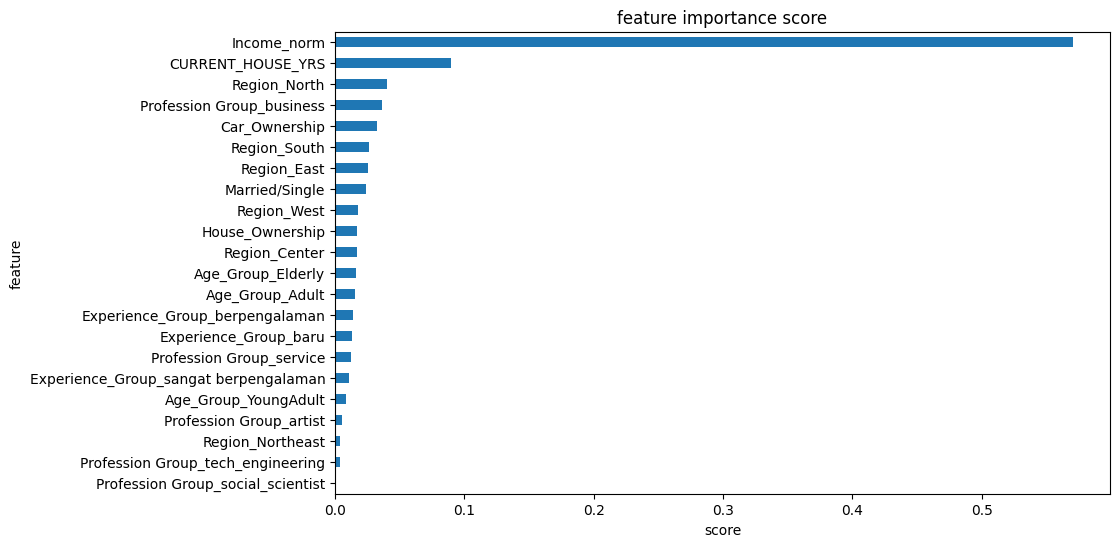

In [ ]:
show_feature_importance(model_dt.best_estimator_)

# KNN

In [ ]:
data.Risk_Class.value_counts(normalize=True)

False    0.666667
True     0.333333
Name: Risk_Class, dtype: float64

In [31]:
# knn
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, y_train) # fit model KNN dari data train

KNeighborsClassifier()

In [34]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knn.fit(X_train, y_train)
model_knn = RandomizedSearchCV(knn, hyperparameters, scoring='recall', random_state=1, cv=5)
model_knn.fit(X_train, y_train)

c:\ANACONDA\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\ANACONDA\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ANACONDA\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ANACONDA\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ANACONDA\Lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29],
                                        'p': [1, 2]},
                   random_state=1, scoring='recall')

## Predict & Evaluation

In [35]:
# Predict & Evaluation
y_pred = model_knn.predict(X_test)
eval_classification(model_knn)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.81
Recall (Test Set): 0.92
F1-Score (Test Set): 0.86
roc_auc (test-proba): 0.94
roc_auc (train-proba): 0.96
recall (crossval train): 0.9972443894977345
recall (crossval test): 0.9316471611919036


# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train

c:\ANACONDA\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Visualisasi

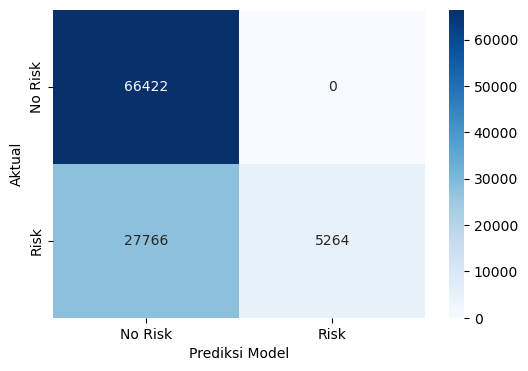

In [26]:
#visualisasi confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = logreg.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)

#heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi Model')
plt.ylabel('Aktual')
class_names = ['No Risk', 'Risk']
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

plt.show()

## Hyperparameter Tuning

In [27]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(1, 110)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()
model_lg = RandomizedSearchCV(logreg, hyperparameters, scoring='roc_auc', random_state=1, cv=5, n_iter=50)
model_lg.fit(X_train, y_train)

c:\ANACONDA\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ANACONDA\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50,
                   param_distributions={'C': [1.0, 3.2244897959183674,
                                              5.448979591836735,
                                              7.673469387755102,
                                              9.89795918367347,
                                              12.122448979591837,
                                              14.346938775510203,
                                              16.57142857142857,
                                              18.79591836734694,
                                              21.020408163265305,
                                              23.244897959183675,
                                              25.46938775510204,
                                              27.693877551020407,
                                              29.918367346938776,
                                              32.14285714285714,
                                              34.36734693877551,
                                              36.59183673469388,
                                              38.816326530612244,
                                              41.04081632653061,
                                              43.26530612244898,
                                              45.48979591836735,
                                              47.714285714285715,
                                              49.93877551020408,
                                              52.16326530612245,
                                              54.38775510204081,
                                              56.61224489795919,
                                              58.83673469387755,
                                              61.06122448979592,
                                              63.285714285714285,
                                              65.51020408163265, ...],
                                        'penalty': ['l1', 'l2']},
                   random_state=1, scoring='roc_auc')

## Predict & Evaluation

In [28]:
# Predict & Evaluation
y_pred = model_lg.predict(X_test)
eval_classification(model_lg)

Accuracy (Test Set): 0.72
Precision (Test Set): 1.00
Recall (Test Set): 0.16
F1-Score (Test Set): 0.27
roc_auc (test-proba): 0.63
roc_auc (train-proba): 0.63
recall (crossval train): 0.9972918990440652
recall (crossval test): 0.9318643569904598


## Check the best hyperparameter after tuning


In [29]:
# Lakukan pencarian hiperparameter pada data pelatihan
model_lg.fit(X_train, y_train)

# Dapatkan model terbaik, parameter terbaik, dan skor terbaik
best_model = model_lg.best_estimator_
best_params = model_lg.best_params_
best_score = model_lg.best_score_

# Cetak hasilnya
print("Best Model:", best_model)
print("Best Parameters:", best_params)
print("Best Score:", best_score)

c:\ANACONDA\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ANACONDA\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Best Model: LogisticRegression(C=58.83673469387755)
Best Parameters: {'penalty': 'l2', 'C': 58.83673469387755}
Best Score: 0.6339481989490486


c:\ANACONDA\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
